In [2]:
import pandas as pd
from sklearn import model_selection
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("test.csv",names=["Chemical formula","A","B","In literature","Valence A","Valence B","Radius A","Radius B","Lowest_distortion","Formation energy","Stability","Magnetic moment","Volume per atom","Band gap","a","b","c","alpha","beta","gamma","Vacancy energy"])

FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'

In [ ]:
df["In_literature"]

In [ ]:
print(df)

In [4]:
#"Chemical formula","A","B","In literature","Valence A","Valence B","Radius A","Radius B","Lowest distortion","Formation energy","Stability","Magnetic moment","Volume per atom","Band gap","a","b","c","alpha","beta","gamma","Vacancy energy"
features=["Valence A","Valence B","Radius A","Radius B","Formation energy","Stability","Magnetic moment","Volume per atom","Band gap","Vacancy energy"]

X = df.loc[:, features].values
Y = df.loc[:, "Lowest_distortion"].values


NameError: name 'df' is not defined

In [5]:
print(X)

NameError: name 'X' is not defined

In [6]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X, Y, test_size=0.2, random_state=0)


NameError: name 'X' is not defined

In [7]:
Y_test.shape

NameError: name 'Y_test' is not defined

In [8]:
clf_ob = svm.SVC(kernel='linear', C=1).fit(X_train, Y_train)

NameError: name 'X_train' is not defined

In [9]:
print(clf_ob.score(X_test, Y_test))

NameError: name 'clf_ob' is not defined

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
  
lr1 = LogisticRegression()
lr1.fit(X_train, Y_train.ravel())
predictions = lr1.predict(X_test)
  
# print classification report
print(classification_report(Y_test, predictions))

NameError: name 'X_train' is not defined

In [11]:
scores_res = model_selection.cross_val_score(clf_ob, X, Y, cv=5)

# Print the accuracy of each fold (i.e. 5 as above we asked cv 5)
print(scores_res)

# And the mean accuracy of all 5 folds.
print(scores_res.mean())

NameError: name 'clf_ob' is not defined

In [12]:
'''
Dimensionality Reduction using PCA (Principal Component Analysis) Here n_components = 2 means, transform into a 2-Dimensional dataset.
'''
from sklearn.decomposition import PCA

import matplotlib.pyplot as pl
pca = PCA(n_components=2, whiten=True).fit(X)
X_pca = pca.transform(X)
print('explained variance ratio:', pca.explained_variance_ratio_)
print('Preserved Variance:', sum(pca.explained_variance_ratio_))

# Print scatter plot to view classification of the simplified dataset
colors = ['r','g','b','y']
target_names = ['cubic', 'orthorhombic', 'rhombohedral','tetragonal']

pl.figure()

target_list = Y.flatten()
for t_name, c in zip(target_names, colors):

    pl.scatter(X_pca[target_list == t_name, 0], X_pca[target_list ==t_name, 1], c=c, label=t_name)

pl.legend()
pl.show()


NameError: name 'X' is not defined

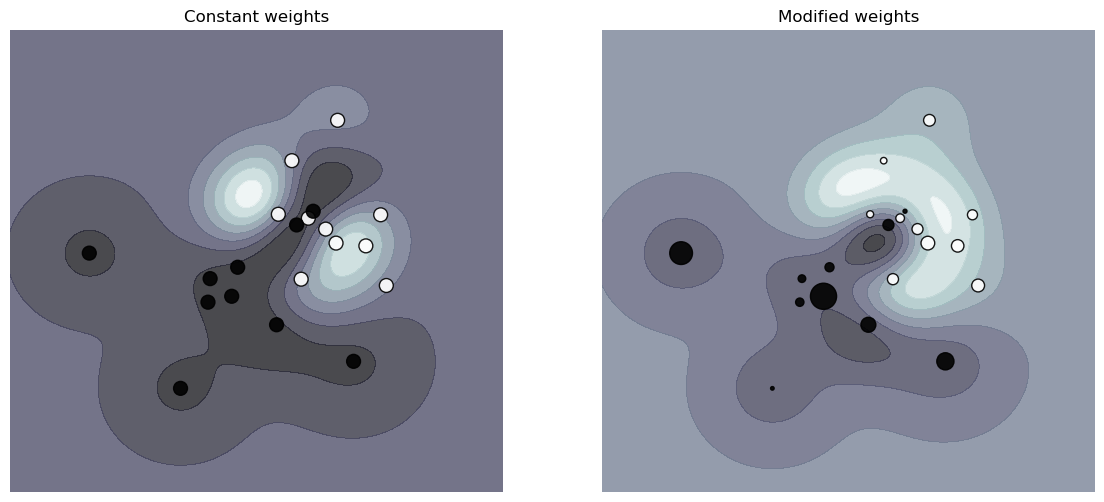

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


def plot_decision_function(classifier, sample_weight, axis, title):
    # plot the decision function
    xx, yy = np.meshgrid(np.linspace(-4, 5, 500), np.linspace(-4, 5, 500))

    Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the line, the points, and the nearest vectors to the plane
    axis.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.bone)
    axis.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        s=100 * sample_weight,
        alpha=0.9,
        cmap=plt.cm.bone,
        edgecolors="black",
    )

    axis.axis("off")
    axis.set_title(title)


# we create 20 points
np.random.seed(0)
X = np.r_[np.random.randn(10, 2) + [1, 1], np.random.randn(10, 2)]
y = [1] * 10 + [-1] * 10
sample_weight_last_ten = abs(np.random.randn(len(X)))
sample_weight_constant = np.ones(len(X))
# and bigger weights to some outliers
sample_weight_last_ten[15:] *= 1
sample_weight_last_ten[9:15] *= 3
sample_weight_last_ten[:9] *= 0.5

# Fit the models.

# This model does not take into account sample weights.
clf_no_weights = svm.SVC(C=50,gamma=1)
clf_no_weights.fit(X, y)

# This other model takes into account some dedicated sample weights.
clf_weights = svm.SVC(C=50,gamma=1)
clf_weights.fit(X, y, sample_weight=sample_weight_last_ten)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_decision_function(
    clf_no_weights, sample_weight_constant, axes[0], "Constant weights"
)
plot_decision_function(clf_weights, sample_weight_last_ten, axes[1], "Modified weights")

plt.show()
